In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import flopy

In [2]:
# load the base model
bws = os.path.join('..', 'base')
m = flopy.modflow.Modflow.load('m.nam', version='mf2005', model_ws=bws, check=False)

In [3]:
# get list of active cells
ib = m.bas6.ibound.array
hk = m.lpf.hk.array[0, :, :]
hk[ib[0, :, :] <= 0] = 1.

In [4]:
# get list of hk files
dpth = os.path.join('..', 'hk')
hk_files = [os.path.join(dpth, fn) for fn in sorted(os.listdir(dpth)) 
            if os.path.splitext(os.path.join(dpth, fn))[1] in ['.DAT', '.dat']]

In [5]:
len(hk_files)

8

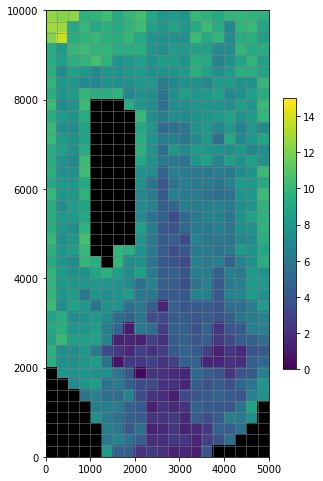

In [6]:
mm = flopy.plot.ModelMap(model=m)
fig = mm.ax.get_figure()
fig.set_figheight(10)
fig.set_figwidth(5)

v = mm.plot_array(m.lpf.hk.array, vmin=0, vmax=15)

mm.plot_grid(lw=0.5)
mm.plot_ibound()

plt.colorbar(v, shrink=0.5);


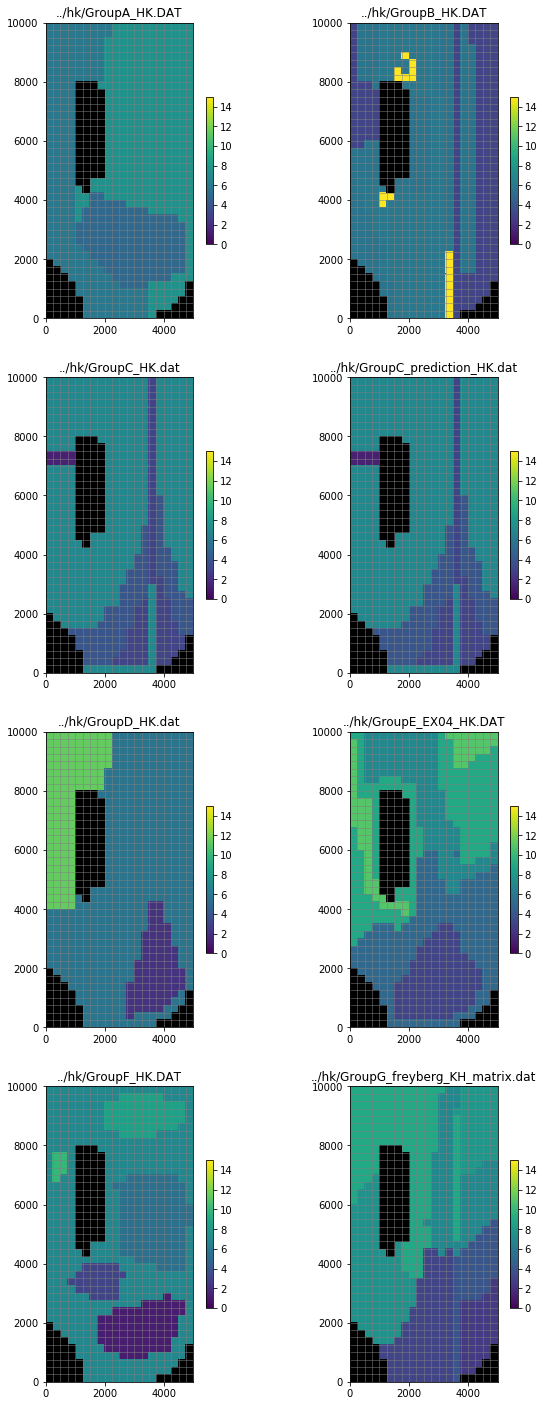

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(10, 25))
axes = axes.flatten()

for idx, fpth in enumerate(hk_files):
    d = np.loadtxt(fpth)
    if d.shape != hk.shape:
        d = flopy.utils.Util2d.load_txt(hk.shape, fpth, fmtin='(10e15.6)', dtype=np.float32)
    ax = axes[idx]
    ax.set_aspect('equal')
    ax.set_title(fpth)
    mm = flopy.plot.ModelMap(model=m, ax=ax)
    v = mm.plot_array(d, vmin=0, vmax=15)
    mm.plot_grid(lw=0.5)
    mm.plot_ibound()
    plt.colorbar(v, shrink=0.5, ax=ax);

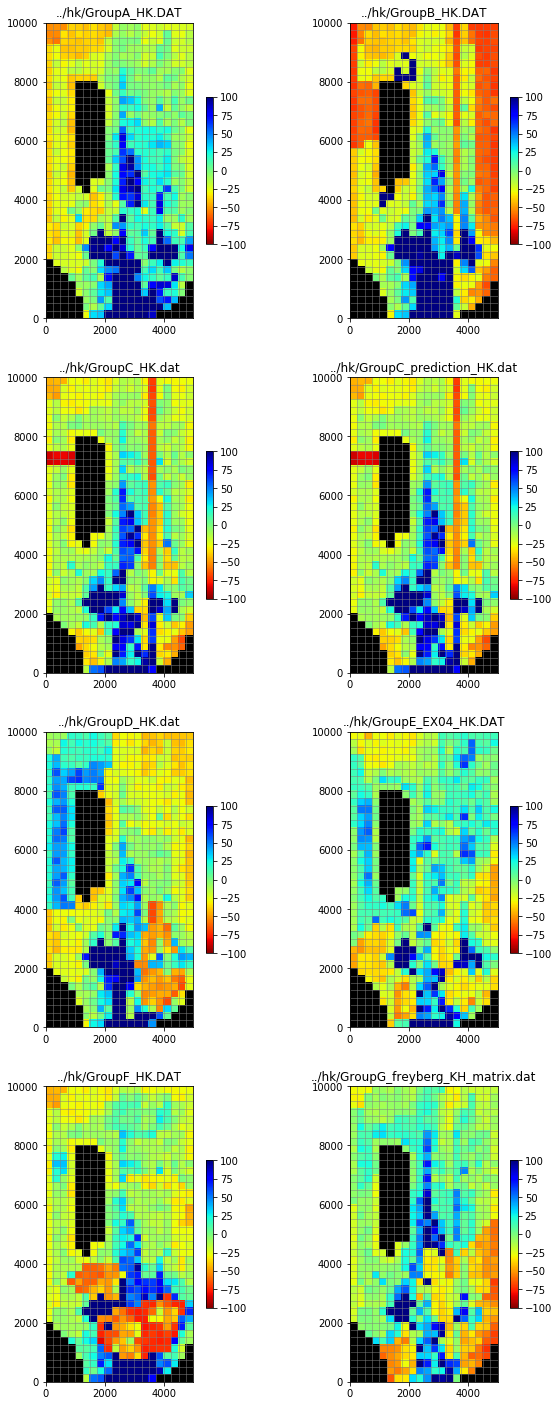

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(10, 25))
axes = axes.flatten()

for idx, fpth in enumerate(hk_files):
    d = np.loadtxt(fpth)
    if d.shape != hk.shape:
        d = flopy.utils.Util2d.load_txt(hk.shape, fpth, fmtin='(10e15.6)', dtype=np.float32)
    ax = axes[idx]
    ax.set_aspect('equal')
    ax.set_title(fpth)
    pd = 100. * (d - hk) / hk
    pd[ib[0, :, :] <= 0] = 0
    mm = flopy.plot.ModelMap(model=m, ax=ax)
    v = mm.plot_array(pd, cmap='jet_r', vmin=-100, vmax=100)
    mm.plot_grid(lw=0.5)
    mm.plot_ibound()
    plt.colorbar(v, shrink=0.5, ax=ax);